# Social Network Ads

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
sns.set(rc={"figure.figsize":[5, 5]}, font_scale=1.5)

In [11]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**No missing values**

Some data analysis
--

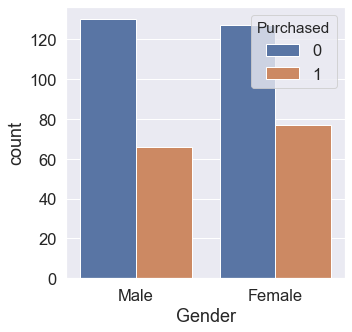

In [71]:
sns.countplot(df["Gender"], hue=df["Purchased"])

In [17]:
df["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

**Femals tend to purchase than male, and either is grater than males**\
``Let`s see if the Estimated salary effects the purchas``

Mean 69742.5
Median 70000.0


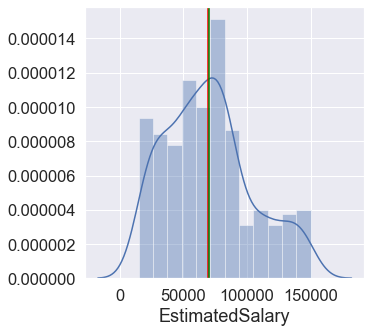

In [42]:
sns.distplot(df["EstimatedSalary"])
print("Mean" ,df["EstimatedSalary"].mean())
print("Median", df["EstimatedSalary"].median())
plt.axvline(df["EstimatedSalary"].mean(), color="red")
plt.axvline(df["EstimatedSalary"].median(), color="green")
# mean and median tend to close to each other

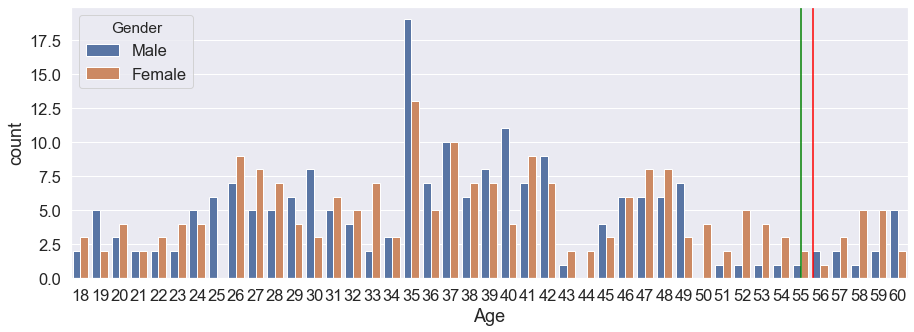

In [64]:
plt.figure(figsize=(15,5))
sns.countplot( df["Age"], hue=df["Gender"])
plt.axvline(df["Age"].mean(), color="red")
plt.axvline(df["Age"].median(), color="green")
# most of the data rend to 37

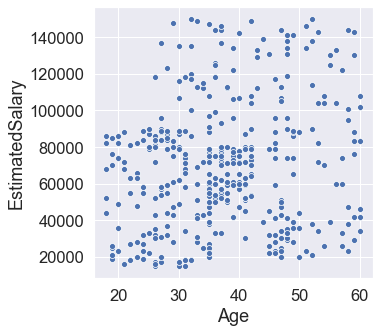

In [79]:
sns.scatterplot(df["Age"], df["EstimatedSalary"])

**I see here the best model to generalize for this data is DecisionTreeClassifier or KNN** ``Let`s see then``

In [94]:
df["Male"] =pd.get_dummies(df["Gender"], drop_first=True)
df.drop("Gender", axis=1, inplace=True)
df.head(2)

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1


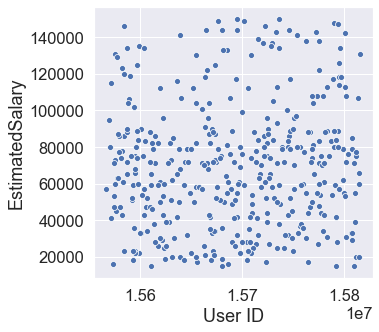

In [98]:
sns.scatterplot(df["User ID"], df["EstimatedSalary"])

**Delete unncessary column**

In [112]:
df.drop(["User ID"], axis=1, inplace=True)

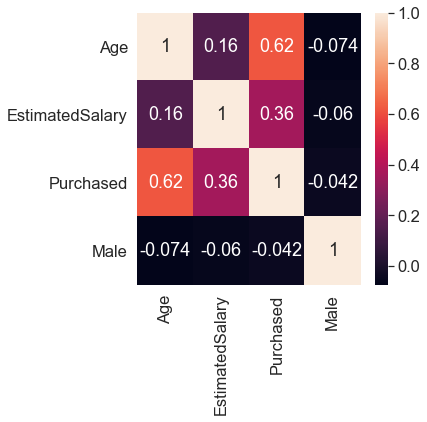

In [117]:
sns.heatmap(df.corr(), annot=True)

**EstimatedSalary affected by Purchased and Purchased strongly affected by Age!**

**Still We keept the rest of all features since we have smallest dataset and not enough details**

# Sicikit-Learn

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [125]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 2/9, random_state=42)

In [127]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Impelement Machine Learning Model

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [145]:
models = {"DecisionTree":DecisionTreeClassifier(),
          "KNNClassifier":KNeighborsClassifier(),"LOGREG":LogisticRegression(), "SVC":SVC(),
          "RandomForest":RandomForestClassifier(n_estimators=75) }

In [182]:
for model_name, model in models.items():
    print(f"{model_name}")
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    print("Accuracy Score", model.score(X_train, y_train))
    print("Accuracy Score", model.score(X_test, y_test))
    print("METRICS")
    print(confusion_matrix(y_test, prediction))
    print("Recall-Score", recall_score(y_test, prediction))
    print("Precision-Score",precision_score(y_test, prediction))
    print("==="*40)

DecisionTree
Accuracy Score 0.9967845659163987
Accuracy Score 0.8539325842696629
METRICS
[[50  6]
 [ 7 26]]
Recall-Score 0.7878787878787878
Precision-Score 0.8125
KNNClassifier
Accuracy Score 0.909967845659164
Accuracy Score 0.9101123595505618
METRICS
[[51  5]
 [ 3 30]]
Recall-Score 0.9090909090909091
Precision-Score 0.8571428571428571
LOGREG
Accuracy Score 0.819935691318328
Accuracy Score 0.8764044943820225
METRICS
[[54  2]
 [ 9 24]]
Recall-Score 0.7272727272727273
Precision-Score 0.9230769230769231
SVC
Accuracy Score 0.9131832797427653
Accuracy Score 0.9213483146067416
METRICS
[[51  5]
 [ 2 31]]
Recall-Score 0.9393939393939394
Precision-Score 0.8611111111111112
RandomForest
Accuracy Score 0.9967845659163987
Accuracy Score 0.8876404494382022
METRICS
[[50  6]
 [ 4 29]]
Recall-Score 0.8787878787878788
Precision-Score 0.8285714285714286


In [178]:
svc = SVC()
svc.fit(X_train, y_train)

svc.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0], dtype=int64)

In [180]:
import joblib
joblib.dump(scaler, "Scaler.h5")
joblib.dump(svc,"SVC.h5")
joblib.dump(X.columns, "Columns.h5")

['Columns.h5']